# 1. A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages. 



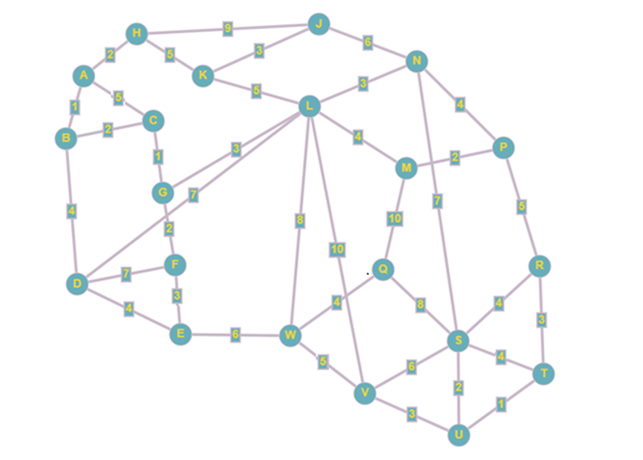

                                                     
                                                     Fig. 1





P.S. The graph in Fig. 1 is a visualisation of the problem. 


## 1.1.1  Identify the differences between a graph and a tree. [0-5] 

##### Answer:

According to Geeks for Geeks, 2023 [1] website those are the differences between graphs and trees:

___***Graphs***___

- A graph consists of vertices, sometimes referred to as nodes, and the edges that join them. Every edge illustrates a link or relationship between two vertices. 

- Edges in graphs can either have a defined direction or not; this is known as directed or undirected graphs. 

- Another name for a directed graph is a digraph. Moreover, graphs can have weighted edges, in which case each edge has a cost or weight assigned to it. There are several ways to represent graphs, including adjacency lists and adjacency matrices.

___***Trees***___

- A tree is a particular kind of connected graph that is acyclic—that is, without cycles.

- Every two vertices in a tree have a unique path that leads there, and there is only one vertex—referred to as the root—that serves as the beginning point for all tree traversals. 

- Trees are useful for modeling hierarchical relationships, as those seen in a file system or an organization.

- Binary or non-binary trees are possible and the non-binary tree allows a node to have any number of offspring, whereas a binary tree limits each node to a maximum of two. 



## 1.1.2  Explain in detail how the graph is an abstraction of the problem. [0-5]


##### Answer:

The presented graph is a data modeled as a graph, paraphasing Linkurious[2], when is talked about graph visualisation. It is designed to give us an overview of possible routes that can be taken as we have the start point and the result to be achieved. Graphs like that are easy way to visualise the entire problem as everything that become more tangible get easier to understand.   


## 1.1.3  Identify the advantages of using a visualisation such as the one shown in Fig. 1. [0-5]


##### Answer:

The Linkurious,2017 [2] website suggested some of the advantages of using a visualisation like the one showed above. They are below:

- Simple to comprehend

Since the human brain analyzes visual information considerably more quickly than written information, we can absorb the information faster. Data that is visually presented enables quicker comprehension, which cuts down on the amount of time needed to decide and act.

- Find out more information in your data

When working with data, our chances of finding insights are increased. Data manipulation is possible with graph visualization tools. It promotes data appropriation and raises the likelihood of finding useful insights. According to a study, managers that utilize visual data discovery tools instead of managed reporting and dashboards are 28% more likely to find information faster.

- View the entire context

Visualizing patterns and context helps us grasp a situation better. Tools for visualizing graphs are ideal for both comprehending the context of the data and for displaying relationships. We obtain a better picture of all the connections, enabling us to find patterns, connections, and correlations in our data.


## 1.2 Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. [0-25]


1.	For the correct functioning of the algorithm we must set some “rules” that it will have to follow. The first one will be specifying the source node as 0 and then from the source to other nodes as infinity.

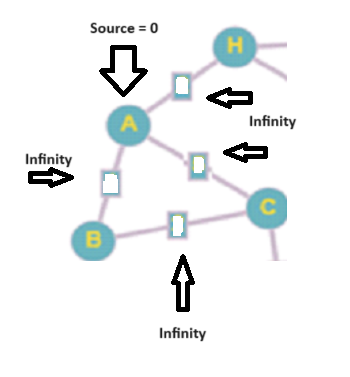

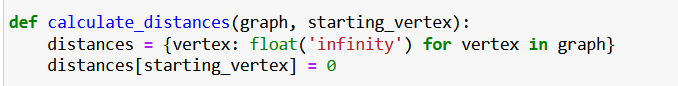


2.	After initialising the distance, the algorithm will start visiting the nodes that are closest to the source node and as the first one visited is the source node itself the distance is 0.
3.	Next step is going through the adjacent nodes of and calculate the node with shorties’ distance from the current node.

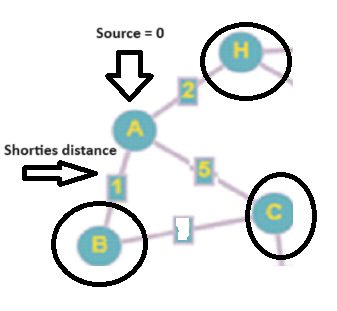

4.	When the shorties distance node is found the algorithm will update the path and it will be the current node.

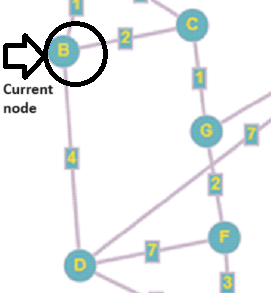


5.	This process will be repeated until all the nodes have been visited. 
 

# 2. The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed. [0-60]

### Dijkstra’s algorithm

In [11]:
import heapq


def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

vgraph = {
    'A':{'B': 1, 'C': 5, 'H': 2},
    'B':{'A': 1, 'C': 2, 'D': 4},
    'C':{'A': 5, 'B': 2, 'G': 1},
    'D':{'B': 4, 'E': 4, 'F': 7, 'L': 7},
    'E':{'D': 4, 'F': 3, 'W': 6},
    'F':{'D': 7, 'E': 3, 'G': 2},
    'G':{'C': 1, 'F': 2, 'L': 3},
    'H':{'A': 2, 'J': 9, 'K': 5},
    'J':{'H': 9, 'K': 3, 'N': 6},
    'K':{'H': 5, 'J': 3, 'L': 5},
    'L':{'D': 7, 'G': 3, 'K': 5, 'M': 4, 'N': 3, 'W': 8, 'V': 10},
    'M':{'L': 4, 'P': 2, 'Q': 10},
    'N':{'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P':{'M': 2, 'N': 4, 'R': 5},
    'Q':{'M': 10, 'S': 8, 'W': 4},
    'R':{'P': 5, 'S': 4, 'T': 3},
    'S':{'N': 7, 'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T':{'R': 3, 'S': 4, 'U': 1},
    'U':{'S': 2, 'T': 1, 'V': 3},
    'W':{'E': 6, 'L': 8, 'Q': 4, 'V': 5},
    'V':{'L': 10, 'S': 6, 'U': 3, 'W': 5},
}


print(calculate_distances(vgraph, 'S'))


{'A': 17, 'B': 16, 'C': 14, 'D': 17, 'E': 16, 'F': 15, 'G': 13, 'H': 19, 'J': 13, 'K': 15, 'L': 10, 'M': 11, 'N': 7, 'P': 9, 'Q': 8, 'R': 4, 'S': 0, 'T': 3, 'U': 2, 'W': 10, 'V': 5}


### A* algorithm

In [15]:
from collections import deque

class Graph:

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function
    def h(self, n):
        H = {
            'A':0,
            'B':2,
            'C':4,
            'D':7,
            'E':9,
            'F':9,
            'G':7,
            'H':4,
            'J':9,
            'K':8,
            'L':10,
            'M':12,
            'N':11,
            'P':14,
            'Q':10,
            'R':16,
            'S':13,
            'T':15,
            'U':12,
            'W':10,
            'V':11

            
            
            
            
            
            
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [17]:
adjacency_list = {
    'A':[('B', 1), ('C', 5), ('H', 2)],
    'B':[('A', 1), ('C', 2), ('D', 4)],
    'C':[('A', 5), ('B', 2), ('G', 1)],
    'D':[('B', 4), ('E', 4), ('F', 7), ('L', 7)],
    'E':[('D', 4), ('F', 3), ('W', 6)],
    'F':[('D', 7), ('E', 3), ('G', 2)],
    'G':[('C', 1), ('F', 2), ('L', 3)],
    'H':[('A', 2), ('J', 9), ('K', 5)],
    'J':[('H', 9), ('K', 3), ('N', 6)],
    'K':[('H', 5), ('J', 3), ('L', 5)],
    'L':[('D', 7), ('G', 3), ('K', 5), ('M', 4),('N', 3), ('W', 8), ('V', 10)],
    'M':[('L', 4), ('P', 2), ('Q', 10)],
    'N':[('J', 6), ('L', 3), ('P', 4), ('S', 7)],
    'P':[('M', 2), ('N', 4), ('R', 5)],
    'Q':[('M', 10), ('S', 8), ('W', 4)],
    'R':[('P', 5), ('S', 4), ('T', 3)],
    'S':[('N', 7), ('Q', 8), ('R', 4), ('T', 4), ('U', 2), ('V', 6)],
    'T':[('R', 3), ('S', 4), ('U', 1)],
    'U':[('S', 2), ('T', 1), ('V', 3)],
    'W':[('E', 6), ('L', 8), ('Q', 4), ('V', 5)],
    'V':[('L', 10), ('S', 6), ('U', 3), ('W', 5)]
}

graph1 = Graph(adjacency_list)
graph1.a_star_algorithm('A', 'S')

Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']


['A', 'B', 'C', 'G', 'L', 'N', 'S']

# References

[1] https://www.geeksforgeeks.org/difference-between-graph-and-tree/

[2] https://linkurious.com/blog/why-graph-visualization-matters/